In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

In [4]:
# df = pd.read_excel(r"C:\Users\Admin\data stb\mock survey data 3.1.xlsx") #desktop
df = pd.read_excel(r"C:\Users\alvin\Tourism assignment\mock survey data 3.1.xlsx")

In [5]:
# Overview
print("Data Shape:", df.shape)
num_columns = len(df.columns)
print("Total number of columns:", num_columns)

print("\n")
print("Data Columns:", df.columns)



print("\n")
print("\nColumn Information:")
df.info()

Data Shape: (22974, 51)
Total number of columns: 51


Data Columns: Index(['case', 'year', 'month', 'Country of Residence', 'City of Residence',
       'Purpose of Visit', 'Main Purpose of Visit', 'Weights_QTR',
       'Air_Terminal', 'Sea_Terminal', 'Land_Terminal',
       'First Visit To Singapore', 'Length of Stay', 'Travel Type', 'Gender',
       'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation',
       'Designation (free text)', 'shopping_fash', 'shopping_jewllery',
       'shopping_watches', 'shopping_wellness', 'shopping_food',
       'shopping_gifts', 'shopping_consumertech', 'shopping_antiques',
       'shopping_others', 'shopping_any', 'totacc', 'totfnb', 'tottran',
       'totbiz', 'totedu', 'totmedi', 'tototh', 'totshopping_rep', 'tot.exp',
       'c4a_1', 'MainHotel', 'Travel companion - Alone',
       'Travel companion - Spouse', 'Travel companion - Your Child/Children',
       'Travel companion - Parents/Parents-in-law',
       'Travel companion - Grand

In [6]:
# Define expected number of rows
expected_rows = 22974

# Initialize lists to store column names
full_columns = []
incomplete_columns = []

# Loop through each column
for col in df.columns:
    non_null_count = df[col].notnull().sum()
    if non_null_count == expected_rows:
        full_columns.append(col)
    else:
        incomplete_columns.append((col, non_null_count))

# Print columns with all values
print("**Columns with FULL data (22,974 rows):**")
for col in full_columns:
    print(f"- {col}")

print("\n")

print("**Columns with MISSING data:**")
for col, count in incomplete_columns:
    print(f"- {col}: {count} non-null values")


**Columns with FULL data (22,974 rows):**
- year
- month
- Country of Residence
- Main Purpose of Visit
- Weights_QTR
- First Visit To Singapore
- Length of Stay
- Travel Type
- Gender
- Marital Status
- Occupation
- shopping_jewllery
- shopping_watches
- shopping_wellness
- shopping_consumertech
- shopping_antiques
- totacc
- totfnb
- tottran
- totbiz
- totedu
- totmedi
- tototh
- totshopping_rep
- tot.exp
- c4a_1
- Travel companion - Alone
- Travel companion - Spouse
- Travel companion - Your Child/Children
- Travel companion - Parents/Parents-in-law
- Travel companion - Grandparents/Grandparents-in-law
- Travel companion - Siblings
- Travel companion - Other relatives
- Travel companion - Friends
- Travel companion - Business associates/Colleagues
- Travel companion - Others


**Columns with MISSING data:**
- case: 22972 non-null values
- City of Residence: 22962 non-null values
- Purpose of Visit: 20641 non-null values
- Air_Terminal: 17977 non-null values
- Sea_Terminal: 2381 non-

In [7]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
case                                                       2
year                                                       0
month                                                      0
Country of Residence                                       0
City of Residence                                         12
Purpose of Visit                                        2333
Main Purpose of Visit                                      0
Weights_QTR                                                0
Air_Terminal                                            4997
Sea_Terminal                                           20593
Land_Terminal                                          20359
First Visit To Singapore                                   0
Length of Stay                                             0
Travel Type                                                0
Gender                                                     0
Marital Status                                           

## Data dictionary

- case - **Unique respondent ID**
- year - **Date of survey response (year)**
- month -	**Date of survey response (year and month)**
- Country of Residence- **Visitor’s country of origin**
- City of Residence	- **Visitor’s home city (if provided)**
- Main Purpose of Visit -	**Primary reason for their trip (e.g. Leisure, Business, MICE)**
- Weights_QTR - **Survey weight to project sample to population**
- Air_Terminal - **Mode of travel - Airplane**
- Sea_Terminal - **Mode of travel - Sea**
- Land_Terminal - **Mode of travel - Land**
- First Visit To Singapore - **Whether this is their first trip to Singapore (Yes/No)**
- Length of Stay - **Number of nights stayed**
- Travel Type - **Non package tour vs. packaged tour**
- Gender
- Marital Status
- Occupation 
- shopping_fash - **Spend on Fashion and Accessories**
- shopping_jewllery - **Spend on Genuine Jewellery**
- shopping_watches - **Spend on Watches and Clocks**
- shopping_wellness - **Spend on Healthcare and Wellness Products + Cosmetics, Perfumes and Toiletries**
- shopping_food - **Spend on Confectionery and Food Items**
- shopping_gifts - **Spend on Souvenirs and Gift**
- shopping_consumertech - **Spend on Consumer Tech**
- shopping_antiques - **Spend on Art and Collectors Items + Furniture, Carpets and Other Household Accessories**
- shopping_others - **shopping others**
- shopping_any - **shopping any**
- totacc - **Total spend on accommodation**
- totfnb - **Total spend on food & beverage**                                        
- tottran - **Total spend on transport**                                                           
- totbiz - **Total spend on Total Business Spend**                                                     
- totedu - **Total spend on Total Education Spend**                                                  
- totmedi - **Total spend on Total Medical Spend**                    
- tototh - **Total spend on Total Other Spend**                 
- totshopping_rep - **Total spend on Total Reported Shopping Spend (uses the shopping variables e.g. shopping_fash etc to calucate this)**
- tot.exp - **Total spend on 	Total Expenditure across all categories**
- c4a_1 **whether column of hotel names has been filled**
- MainHotel	- **Categorical code for hotel class or brand**
- Travel companion – **Binary for each companion type (alone, spouse, Your child/children, Parents/Parents-in-law, Grandparents/Grandparents-in-law,
  Siblings, Other relatives, Friends, Business associates/Colleagues, Others.)**



## 1. Describe the analytical approach you will take and data fields you would look into when it comes to doing exploratory data analysis.
Understand the the shape of the dataset, and what missing values are found in the dataset. Understand the data structure of each of the variable.
Variables are recoded (changing to datetime, categorical variables) after observations and running different test. Lastly, formulate possible problem statement to answer. Finding various variables to transform - e.g. age band, length of stay etc.

## 2. Highlight the data idiosyncrasies / issues you found in this dataset and how would you address the issues identified.
The data missing values for cases that doesnt have air, sea, land terminal - suggesting that there is possiblity of lack of proper documentation, remove these 3 participants. 

## **Columns with FULL data (22,974 rows):**
- year
- month
- Country of Residence
- Main Purpose of Visit
- Weights_QTR
- First Visit To Singapore
- Length of Stay
- Travel Type
- Gender
- Marital Status
- Occupation
- shopping_jewllery
- shopping_watches
- shopping_wellness
- shopping_consumertech
- shopping_antiques
- totacc
- totfnb
- tottran
- totbiz
- totedu
- totmedi
- tototh
- totshopping_rep
- tot.exp
- c4a_1
- Travel companion - Alone
- Travel companion - Spouse
- Travel companion - Your Child/Children
- Travel companion - Parents/Parents-in-law
- Travel companion - Grandparents/Grandparents-in-law
- Travel companion - Siblings
- Travel companion - Other relatives
- Travel companion - Friends
- Travel companion - Business associates/Colleagues
- Travel companion - Others


**Columns with MISSING data:**
- case: 22972 non-null values (remove column)
- City of Residence: 22962 non-null values (12 cases, will change them to others)
- Purpose of Visit: 20641 non-null values (remove this column, given that the dataset has main purpose of visit)
- Air_Terminal: 17977 non-null values (change to new variable 1, air travel)
- Sea_Terminal: 2381 non-null values (change to new variable 2, sea travel)
- Land_Terminal: 2615 non-null values (change to new variable 3, land travel)
- Occupation.1: 2790 non-null values (remove column, occupation is found in another column)
- Other Designation: 2789 non-null values (remove column, occupation is found in another column)
- Designation (free text): 192 non-null values (remove column, occupation is found in another column)
- shopping_fash: 22889 non-null values (k nearest neighbor imupte reason being that they may be correlated)
- shopping_food: 22968 non-null values (k nearest neighbor imupte reason being that they may be correlated)
- shopping_gifts: 22972 non-null values (k nearest neighbor imupte reason being that they may be correlated)
- shopping_others: 22971 non-null values (k nearest neighbor imupte reason being that they may be correlated)
- shopping_any: 22878 non-null values (k nearest neighbor imupte reason being that they may be correlated)
- MainHotel: 16284 non-null values (for correlation hotel will need to just include only people who have filled up hotel, sample enough to test various assumptions)

In [12]:
df[['shopping_fash', 'shopping_food', 'shopping_gifts', 'shopping_others', 'shopping_any']].nunique()

shopping_fash      420
shopping_food      274
shopping_gifts     249
shopping_others    257
shopping_any       914
dtype: int64

In [13]:
# Preprocessing data - part 1 - impute 'shopping_fash', 'shopping_food', 'shopping_others', 'shopping_any' 

df_trans = df.copy(deep=True)
impute_cols = ['shopping_fash', 'shopping_food', 'shopping_gifts', 'shopping_others', 'shopping_any']

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_trans[impute_cols] = knn_imputer.fit_transform(df_trans[impute_cols])

In [14]:
df_trans[['shopping_fash', 'shopping_food', 'shopping_gifts', 'shopping_others', 'shopping_any']].isnull().sum()

shopping_fash      0
shopping_food      0
shopping_gifts     0
shopping_others    0
shopping_any       0
dtype: int64

In [15]:
# Filter rows where missing city of residence
no_city_resid_df = df_trans[df_trans['City of Residence'].isnull()] 

# Show the result
print(f"Number of rows with NO City of Residence: {len(no_city_resid_df)}")
display(no_city_resid_df)


Number of rows with NO City of Residence: 12


,case,year,month,Country of Residence,City of Residence,Purpose of Visit,Main Purpose of Visit,Weights_QTR,Air_Terminal,Sea_Terminal,...,Travel companion - Alone,Travel companion - Spouse,Travel companion - Your Child/Children,Travel companion - Parents/Parents-in-law,Travel companion - Grandparents/Grandparents-in-law,Travel companion - Siblings,Travel companion - Other relatives,Travel companion - Friends,Travel companion - Business associates/Colleagues,Travel companion - Others
4644,10314.0,2018,3,Others,NaN,Leisure,Visiting friends/ relatives (who are not inter...,510.800000,3.0,NaN,...,0,1,0,0,0,0,0,0,0,0
7543,13213.0,2018,4,Others,NaN,Leisure,Holiday/ Rest & Relax,685.666667,1.0,NaN,...,0,1,0,0,0,0,0,0,0,0
7955,13625.0,2018,5,Others,NaN,Leisure,Holiday/ Rest & Relax,413.812500,1.0,NaN,...,0,1,0,0,0,0,0,0,0,0
11205,16875.0,2018,7,Colombia,NaN,Leisure,Holiday/ Rest & Relax,347.603923,3.0,NaN,...,0,0,0,0,0,0,0,1,0,0
12291,17961.0,2018,7,Others,NaN,Leisure,Holiday/ Rest & Relax,254.925445,1.0,NaN,...,0,1,0,0,0,0,0,0,0,0
12292,17962.0,2018,7,Others,NaN,Leisure,Holiday/ Rest & Relax,536.253543,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
12293,17963.0,2018,7,Others,NaN,Leisure,Holiday/ Rest & Relax,849.885327,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
12775,18445.0,2018,7,United States,NaN,Leisure,Holiday/ Rest & Relax,646.217595,3.0,NaN,...,0,1,0,0,0,0,0,0,0,0
17840,2660.0,2018,10,South Korea,NaN,Leisure,Holiday/ Rest & Relax,1072.125000,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
20528,5348.0,2018,11,Ireland,NaN,Leisure,Sightseeing/ Attractions,641.000000,2.0,NaN,...,0,1,0,0,0,0,0,0,0,0


In [16]:
# Filter rows where all three terminal fields are missing
no_terminal_df = df_trans[
    df_trans['Air_Terminal'].isnull() &
    df_trans['Sea_Terminal'].isnull() &
    df_trans['Land_Terminal'].isnull()
]

# Show the result
print(f"Number of rows with NO terminal data: {len(no_terminal_df)}")
display(no_terminal_df)


Number of rows with NO terminal data: 3


,case,year,month,Country of Residence,City of Residence,Purpose of Visit,Main Purpose of Visit,Weights_QTR,Air_Terminal,Sea_Terminal,...,Travel companion - Alone,Travel companion - Spouse,Travel companion - Your Child/Children,Travel companion - Parents/Parents-in-law,Travel companion - Grandparents/Grandparents-in-law,Travel companion - Siblings,Travel companion - Other relatives,Travel companion - Friends,Travel companion - Business associates/Colleagues,Travel companion - Others
695,699.0,2018,1,Vietnam,Hanoi,Leisure,Holiday/ Rest & Relax,1001.000000,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
806,811.0,2018,1,Thailand,Chiang Mai,Leisure,Visiting friends/ relatives (who are not inter...,625.809524,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
819,824.0,2018,1,Italy,Others,Leisure,Holiday/ Rest & Relax,514.500000,NaN,NaN,...,0,1,1,0,0,0,0,0,0,0


In [17]:
#removing city of residence null values - 12 cases
df_cleaned = df_trans.dropna(subset=['City of Residence'])
df_cleaned['City of Residence'].isnull().sum()

0

In [18]:
df_cleaned = df_cleaned[
    ~(df_cleaned['Air_Terminal'].isnull() & df_cleaned['Sea_Terminal'].isnull() & df_cleaned['Land_Terminal'].isnull())
].copy()

In [19]:
# Filter rows where all three terminal fields are missing
no_terminal_df = df_cleaned[
    df_cleaned['Air_Terminal'].isnull() &
    df_cleaned['Sea_Terminal'].isnull() &
    df_cleaned['Land_Terminal'].isnull()
]

# Show the result
print(f"Number of rows with NO terminal data: {len(no_terminal_df)}")
display(no_terminal_df)


Number of rows with NO terminal data: 0


,case,year,month,Country of Residence,City of Residence,Purpose of Visit,Main Purpose of Visit,Weights_QTR,Air_Terminal,Sea_Terminal,...,Travel companion - Alone,Travel companion - Spouse,Travel companion - Your Child/Children,Travel companion - Parents/Parents-in-law,Travel companion - Grandparents/Grandparents-in-law,Travel companion - Siblings,Travel companion - Other relatives,Travel companion - Friends,Travel companion - Business associates/Colleagues,Travel companion - Others


In [20]:
# make the data into datetime

df_cleaned['date'] = pd.to_datetime(dict(year=df_cleaned['year'], month=df_cleaned['month'], day=1))

In [21]:
df_cleaned[['year', 'month', 'date']].describe()

,year,month,date
count,22959.0,22959.000000,22959
mean,2018.0,6.497452,2018-06-16 10:17:55.343002880
min,2018.0,1.000000,2018-01-01 00:00:00
25%,2018.0,4.000000,2018-04-01 00:00:00
50%,2018.0,7.000000,2018-07-01 00:00:00
75%,2018.0,9.000000,2018-09-01 00:00:00
max,2018.0,12.000000,2018-12-01 00:00:00
std,0.0,3.460224,NaN


## changing the travel companion to following
- travel alone = Travel companion - Alone
- travel with family = spouse, parents, grandparents, silbings
- travel with friends
- travel with colleagues
- travel with others

In [23]:
# Create a new column 'Travel_With_Family'
df_cleaned['Travel_With_Family'] = (
    (df_cleaned['Travel companion - Spouse'] == 1) |
    (df_cleaned['Travel companion - Parents/Parents-in-law'] == 1) |
    (df_cleaned['Travel companion - Grandparents/Grandparents-in-law'] == 1) |
    (df_cleaned['Travel companion - Siblings'] == 1)|
    (df_cleaned['Travel companion - Other relatives'] == 1)
).astype(int)

# Check result
print(df_cleaned['Travel_With_Family'].value_counts())

Travel_With_Family
1    11779
0    11180
Name: count, dtype: int64


In [24]:
def classify_transport(row):
    if pd.notnull(row['Air_Terminal']):
        return 'Air'
    elif pd.notnull(row['Sea_Terminal']):
        return 'Sea'
    elif pd.notnull(row['Land_Terminal']):
        return 'Land'

# Apply the function to create a new column
df_cleaned['Main_Transport_Mode'] = df_cleaned.apply(classify_transport, axis=1)


In [25]:
df_cleaned['Main_Transport_Mode'].value_counts()

Main_Transport_Mode
Air     17966
Land     2612
Sea      2381
Name: count, dtype: int64

In [26]:
print(df_cleaned['Main_Transport_Mode'].value_counts())

Main_Transport_Mode
Air     17966
Land     2612
Sea      2381
Name: count, dtype: int64


## Comments and note to self
1. Total spend on Total Reported Shopping Spend (Most likely uses the shopping variables e.g. shopping_fash etc to calucate this)
2. Travel companion - others most likely gf/bf etc - can be not engaged.
4. clustering model most likely do not need to look at shopping, just focus on total expenses
5. ideas for feature - tot.exp / Length of Stay (understand daily expenses), length of stay (< 3 days, 4 to 7 days, 7 days to 14 days, > 14 days)
6. change date and time

In [29]:
df_cleaned['Length of Stay'].describe()

count    22959.000000
mean         3.418877
std          3.311082
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         60.000000
Name: Length of Stay, dtype: float64

In [30]:
df_cleaned['Length of Stay'].value_counts()

Length of Stay
3     5485
2     4386
4     4302
1     2376
5     2338
0     1741
6      825
7      708
8      164
10     101
14      93
9       87
11      49
12      35
13      32
30      24
15      23
27      17
21      15
29      15
20      15
19      14
17      13
18      12
23      10
16       8
24       8
31       6
28       6
26       5
25       5
57       4
22       4
60       4
56       3
32       3
51       2
43       2
38       2
49       2
46       2
48       2
58       1
40       1
36       1
42       1
50       1
59       1
34       1
53       1
55       1
35       1
37       1
Name: count, dtype: int64

In [31]:
# given that the spread of the data, length of stay will be categorised accordingly (conditional formatting)
def encode_stay(length):
    if pd.isnull(length):
        return None
    elif length <= 3:
        return 0  # Short Stay
    elif 4 <= length <= 7:
        return 1  # Medium Stay
    else:
        return 2  # Long Stay

df_cleaned['Stay_Length_Code'] = df_cleaned['Length of Stay'].apply(encode_stay)


In [32]:
df_cleaned['Stay_Length_Code'].value_counts()

Stay_Length_Code
0    13988
1     8173
2      798
Name: count, dtype: int64

In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22959 entries, 0 to 22973
Data columns (total 55 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   case                                                 22957 non-null  float64       
 1   year                                                 22959 non-null  int64         
 2   month                                                22959 non-null  int64         
 3   Country of Residence                                 22959 non-null  object        
 4   City of Residence                                    22959 non-null  object        
 5   Purpose of Visit                                     20626 non-null  object        
 6   Main Purpose of Visit                                22959 non-null  object        
 7   Weights_QTR                                          22959 non-null  float64       
 8   A

In [34]:
df_cleaned['Travel_Type_Code'] = 0
df_cleaned.loc[df_cleaned['Travel Type'] == 'Packaged', 'Travel_Type_Code'] = 1


In [35]:
df_cleaned['Travel_Type_Code'].value_counts()

Travel_Type_Code
0    19349
1     3610
Name: count, dtype: int64

In [36]:
# Gender status recoding
df_cleaned['Gender_Code'] = 0
df_cleaned.loc[df_cleaned['Gender'] == 'Female', 'Gender_Code'] = 1


In [37]:
df_cleaned['Marital Status'].value_counts() 

Marital Status
Married     15089
Single       7446
Divorced      269
Widowed       136
Refused        19
Name: count, dtype: int64

In [38]:
# Martial status recoding

df_cleaned['Marital_Status_Code'] = None

df_cleaned.loc[df_cleaned['Marital Status'] == 'Single', 'Marital_Status_Code'] = 0
df_cleaned.loc[df_cleaned['Marital Status'] == 'Married', 'Marital_Status_Code'] = 1
df_cleaned.loc[df_cleaned['Marital Status'].isin(['Divorced', 'Widowed', 'Refused']), 'Marital_Status_Code'] = 2

# Optionally convert to integer type
df_cleaned['Marital_Status_Code'] = df_cleaned['Marital_Status_Code'].astype(int)



In [39]:
df_cleaned['Marital_Status_Code'].value_counts()

Marital_Status_Code
1    15089
0     7446
2      424
Name: count, dtype: int64

In [40]:
df_cleaned['Occupation'].value_counts()

Occupation
Other White collar (teacher, nurse, secretary,                3952
Executive (sales, administration)                             3439
Manager (CEO, company director, senior manager)               3104
Professionals (doctor, lawyer, lecturer, etc)                 2681
Homemaker (full time)                                         2002
Businessman (small company, <50 people)                       1919
Student                                                       1700
Blue collar (technician, hairdresser, hawker, taxi drivers    1360
Retired                                                       1245
Businessman (medium size company, 50 -250 people)              550
Unemployed                                                     501
Others (specify)                                               287
Businessman (large company, > 250 people)                      219
Name: count, dtype: int64

In [41]:
# Create occupation_based column
df_cleaned['occupation_coded'] = None

# Group 1 → Code 1: Non-working group
df_cleaned.loc[
    df_cleaned['Occupation'].isin([
        'Retired',
        'Student',
        'Homemaker (full time)',
        'Unemployed',
        'Others (specify)'
    ]),
    'occupation_coded'
] = 1

# Group 2 → Code 2: Working professionals (white collar, executive, blue collar, etc.)
df_cleaned.loc[
    df_cleaned['Occupation'].isin([
        'Other White collar (teacher, nurse, secretary,',
        'Executive (sales, administration)',
        'Manager (CEO, company director, senior manager)',
        'Professionals (doctor, lawyer, lecturer, etc)',
        'Blue collar (technician, hairdresser, hawker, taxi drivers'
    ]),
    'occupation_coded'
] = 2

# Group 3 → Code 3: Business owners
df_cleaned.loc[
    df_cleaned['Occupation'].isin([
        'Businessman (small company, <50 people)',
        'Businessman (medium size company, 50 -250 people)',
        'Businessman (large company, > 250 people)'
    ]),
    'occupation_coded'
] = 3


In [42]:
# Feature creation

# Replace 0 with 1 in Length of Stay
df_cleaned['Length of Stay_fixed'] = df_cleaned['Length of Stay'].replace(0, 1)

# important to note - anyone who steps into singapore as long as the length of day is 0 I will change it to 1

# Calculate average daily expense using the fixed column
df_cleaned['avg_daily_expense'] = df_cleaned['tot.exp'] / df_cleaned['Length of Stay_fixed']




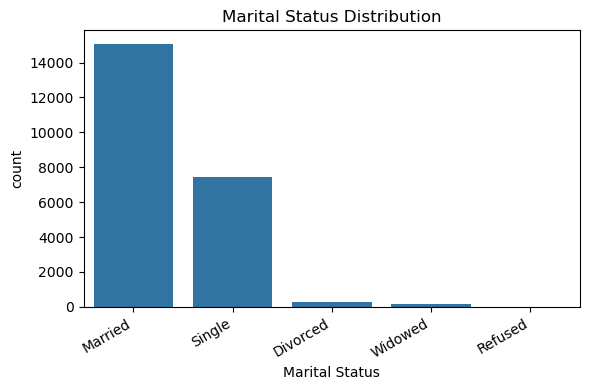

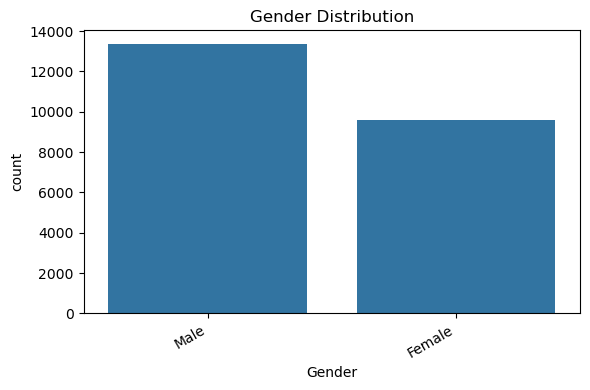

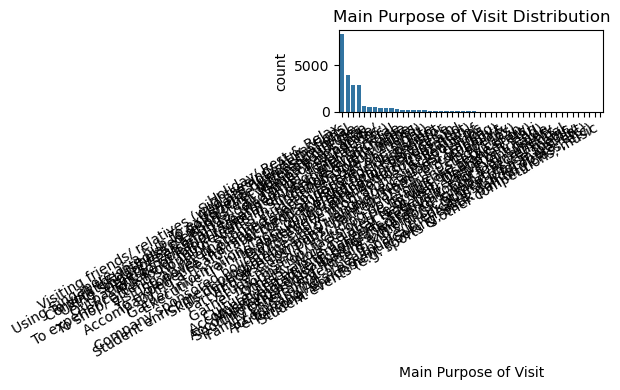

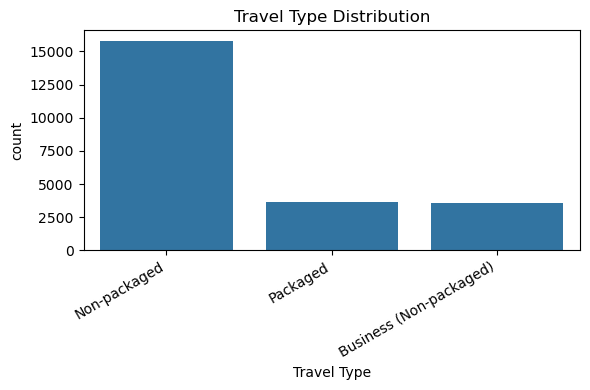

In [43]:
cols_to_check = [
    'Marital Status', 
    'Gender', 
    'Main Purpose of Visit', 
    'Travel Type'
]


for col in cols_to_check:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_cleaned, x=col, order=df_cleaned[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()


In [44]:
for col in cols_to_check:
    print(f"\n--- Frequency Table: {col} ---")
    print(df_cleaned[col].value_counts(dropna=False))



--- Frequency Table: Marital Status ---
Marital Status
Married     15089
Single       7446
Divorced      269
Widowed       136
Refused        19
Name: count, dtype: int64

--- Frequency Table: Gender ---
Gender
Male      13371
Female     9588
Name: count, dtype: int64

--- Frequency Table: Main Purpose of Visit ---
Main Purpose of Visit
Holiday/ Rest & Relax                                           8313
Sightseeing/ Attractions                                        3930
Visiting friends/ relatives (who are not international          2925
General business purpose                                        2847
To experience different cultures                                 573
Using Singapore as a hub to go to other destinations: Stop       498
To visit the integrated resorts(e.g. Marina Bay Sands,           480
Corporate/ business meetings   (a. Venue of corporate/           434
Using Singapore as a hub to go to other destinations:            408
Others - Personal (e.g. weddings, funer

In [45]:
df_cleaned['avg_daily_expense'].describe()

count    22959.000000
mean       360.307527
std        484.280639
min          0.000000
25%        123.361667
50%        258.182500
75%        444.670000
max      29206.420000
Name: avg_daily_expense, dtype: float64

In [46]:
df_cleaned['totshopping_rep'].describe()

count    22959.000000
mean       331.863999
std        371.034339
min          1.620000
25%        112.040000
50%        228.540000
75%        417.195000
max       5148.680000
Name: totshopping_rep, dtype: float64

In [47]:
df_cleaned['tot.exp'].describe()

count    22959.000000
mean       923.135501
std        840.053325
min          0.000000
25%        355.880000
50%        798.050000
75%       1280.260000
max      29206.420000
Name: tot.exp, dtype: float64

In [48]:
df_cleaned.columns

Index(['case', 'year', 'month', 'Country of Residence', 'City of Residence',
       'Purpose of Visit', 'Main Purpose of Visit', 'Weights_QTR',
       'Air_Terminal', 'Sea_Terminal', 'Land_Terminal',
       'First Visit To Singapore', 'Length of Stay', 'Travel Type', 'Gender',
       'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation',
       'Designation (free text)', 'shopping_fash', 'shopping_jewllery',
       'shopping_watches', 'shopping_wellness', 'shopping_food',
       'shopping_gifts', 'shopping_consumertech', 'shopping_antiques',
       'shopping_others', 'shopping_any', 'totacc', 'totfnb', 'tottran',
       'totbiz', 'totedu', 'totmedi', 'tototh', 'totshopping_rep', 'tot.exp',
       'c4a_1', 'MainHotel', 'Travel companion - Alone',
       'Travel companion - Spouse', 'Travel companion - Your Child/Children',
       'Travel companion - Parents/Parents-in-law',
       'Travel companion - Grandparents/Grandparents-in-law',
       'Travel companion - Siblings', 

## understand their spending behaviours and preferences 

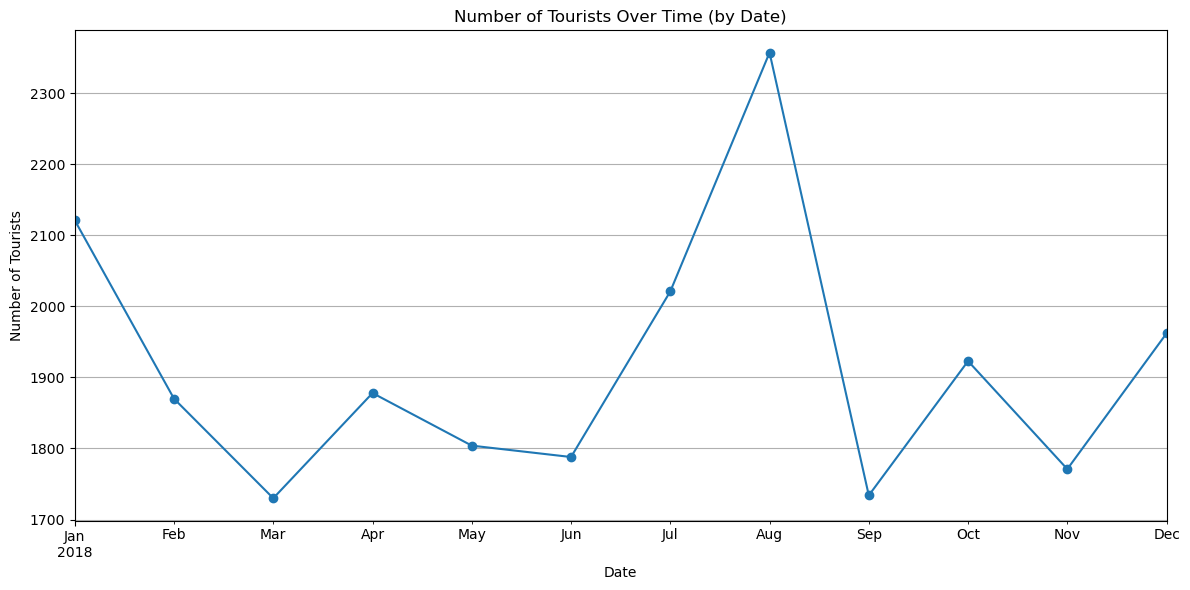

In [50]:
# Group by date and count number of tourists
monthly_counts = df_cleaned.groupby('date').size()

# Plot
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o')
plt.title('Number of Tourists Over Time (by Date)')
plt.xlabel('Date')
plt.ylabel('Number of Tourists')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
df_cleaned['Country of Residence'].value_counts().sort_values(ascending=False).head(20)

Country of Residence
Indonesia         4221
China             2960
Australia         1620
India             1451
Malaysia          1366
Japan             1189
Philippines       1009
Hong Kong          969
Thailand           816
South Korea        805
United States      760
United Kingdom     729
Vietnam            670
Taiwan             558
Germany            443
France             251
New Zealand        202
Canada             155
Sri Lanka          146
Switzerland        146
Name: count, dtype: int64

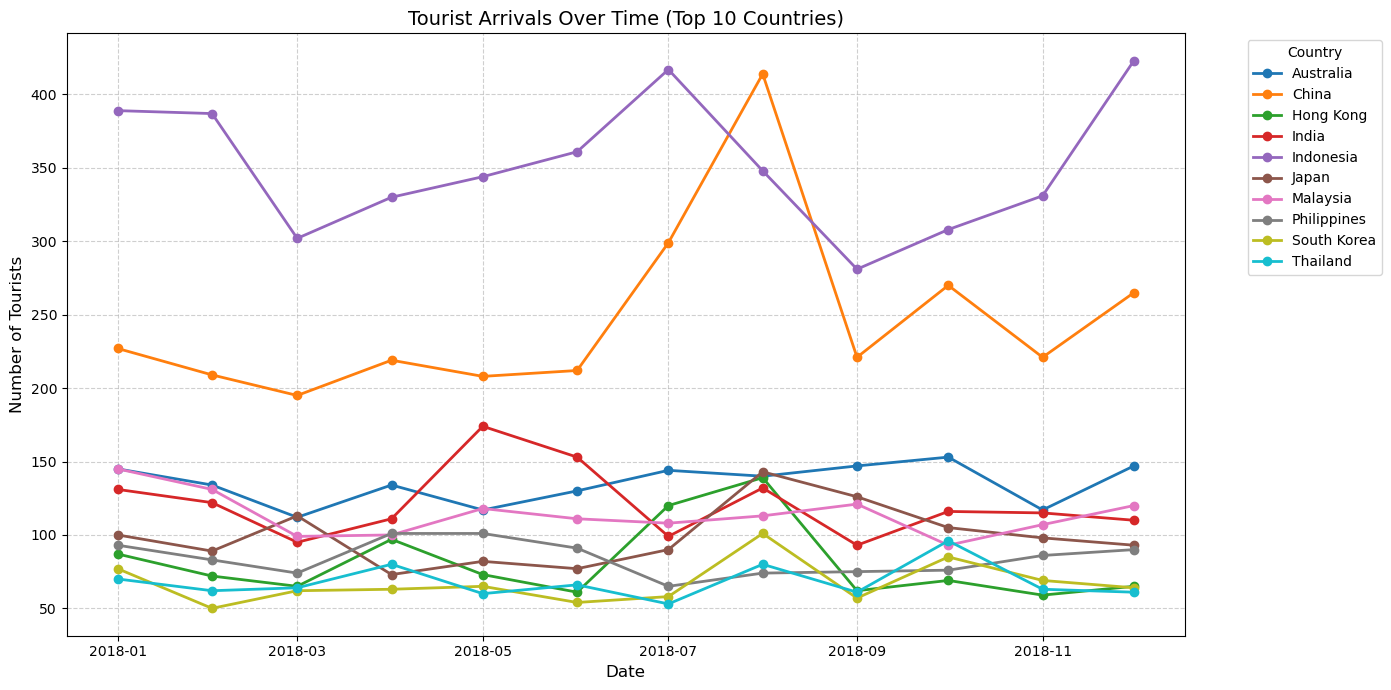

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Get top 10 countries
top_countries = df_cleaned['Country of Residence'].value_counts().head(10).index

# Filter data to include only top 10 countries
df_top = df_cleaned[df_cleaned['Country of Residence'].isin(top_countries)]

# Group by date and country, then count tourists
country_trends = df_top.groupby(['date', 'Country of Residence']).size().unstack()

# Plot
plt.figure(figsize=(14, 7))
for country in country_trends.columns:
    plt.plot(country_trends.index, country_trends[country], marker='o', label=country, linewidth=2)

plt.title('Tourist Arrivals Over Time (Top 10 Countries)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tourists', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

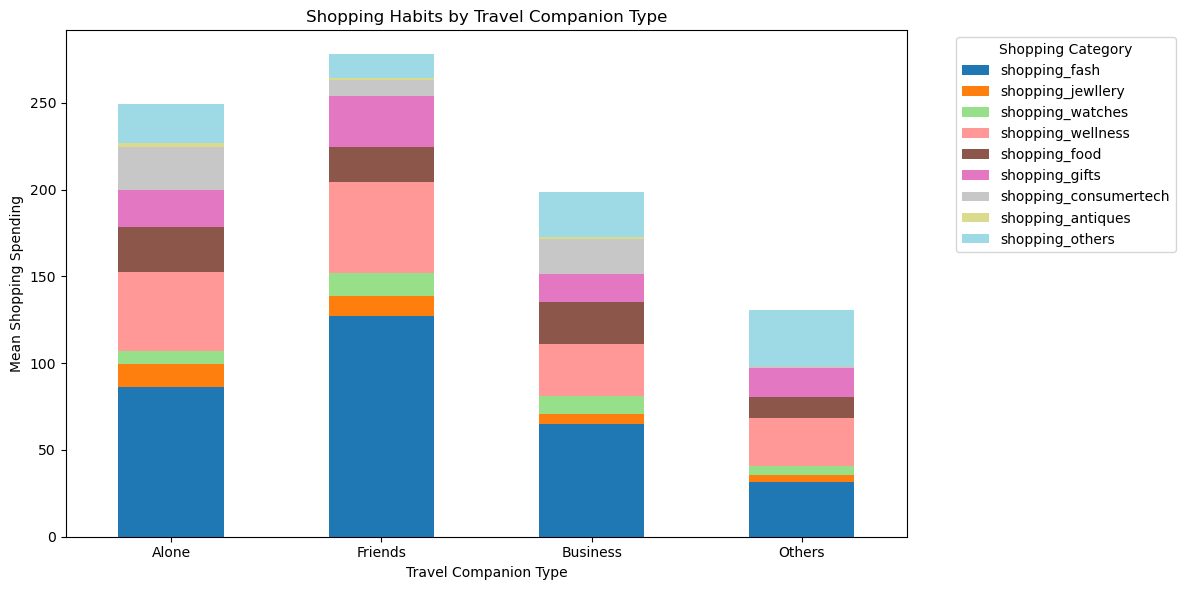

In [53]:
# Define columns
shopping_cols = [
    'shopping_fash', 'shopping_jewllery', 'shopping_watches',
    'shopping_wellness', 'shopping_food', 'shopping_gifts',
    'shopping_consumertech', 'shopping_antiques', 'shopping_others'
]

companion_cols = {
    'Travel companion - Alone': 'Alone',
    'Travel companion - Friends': 'Friends',
    'Travel companion - Business associates/Colleagues': 'Business',
    'Travel companion - Others': 'Others'
}

# Store results
result = {}

# For each companion type, compute average shopping behavior
for col, label in companion_cols.items():
    filtered = df_cleaned[df_cleaned[col] == 1]
    result[label] = filtered[shopping_cols].mean()

# Combine into a DataFrame
result_df = pd.DataFrame(result).T  # Transpose so rows = companion types

# Plot stacked bar chart
result_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Shopping Habits by Travel Companion Type')
plt.ylabel('Mean Shopping Spending')
plt.xlabel('Travel Companion Type')
plt.xticks(rotation=0)
plt.legend(title='Shopping Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [54]:
result_df

,shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others
Alone,86.524580,13.188757,7.163592,45.400390,26.202656,21.265995,24.903824,2.332632,22.564938
Friends,127.084109,11.428352,13.428464,52.431296,20.432345,29.162365,9.083537,1.505283,13.377055
Business,64.800188,5.692173,10.564263,30.067741,23.966080,16.068096,20.525949,1.055381,25.793828
Others,31.643766,3.911091,5.021459,28.033542,11.702790,17.191886,1.072961,0.000000,32.270386


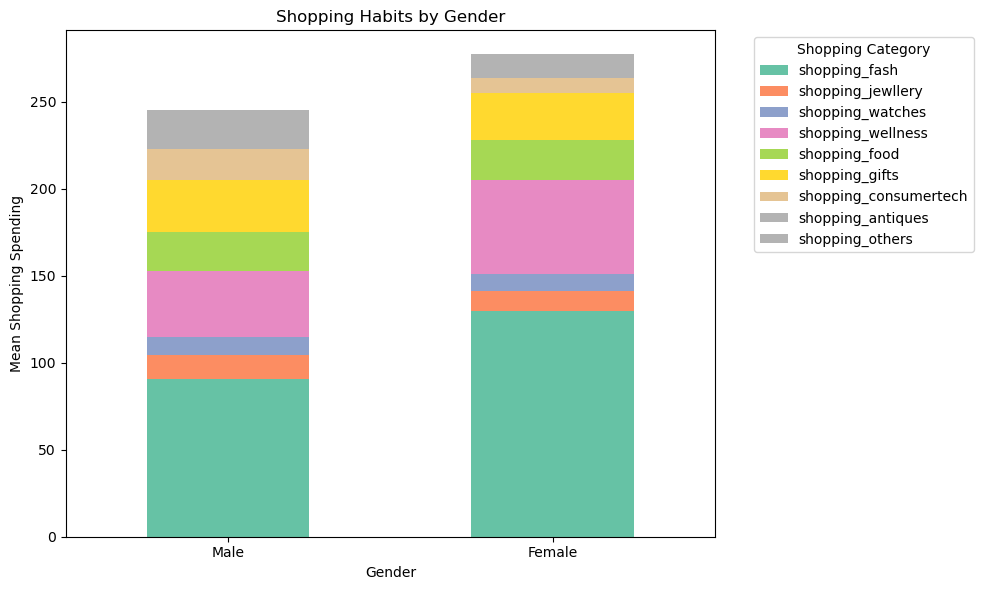

In [55]:
# Stacked bar chart: Gender
gender_labels = {0: 'Male', 1: 'Female'}

# Group by Gender_Code and compute mean shopping habits
gender_summary = df_cleaned.groupby('Gender_Code')[shopping_cols].mean()
gender_summary.index = gender_summary.index.map(gender_labels)

# Plot
gender_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Shopping Habits by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Shopping Spending')
plt.xticks(rotation=0)
plt.legend(title='Shopping Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

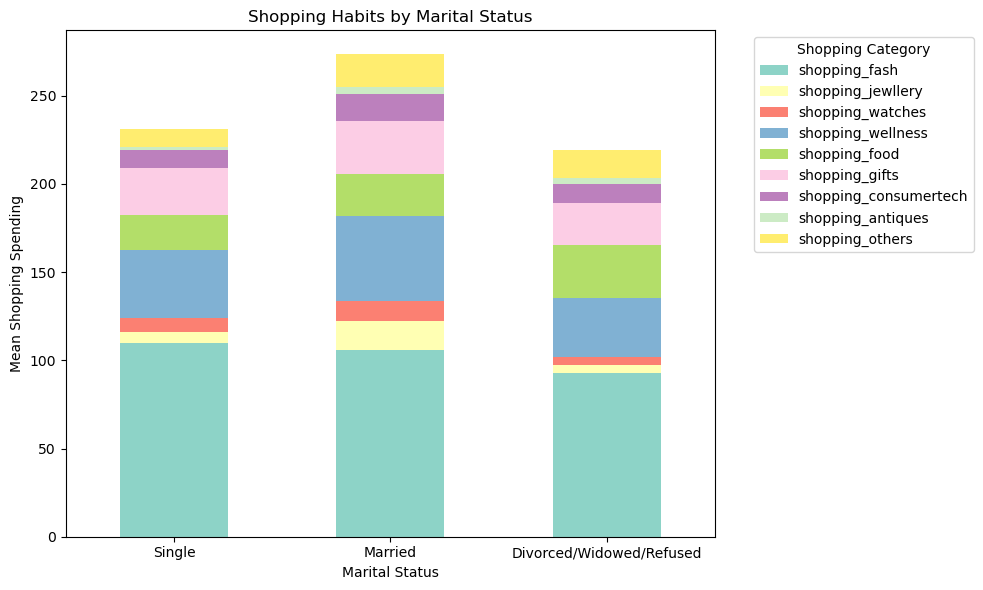

In [56]:
# Stacked bar chart: Marital Status
marital_labels = {0: 'Single', 1: 'Married', 2: 'Divorced/Widowed/Refused'}

# Group and plot
marital_summary = df_cleaned.groupby('Marital_Status_Code')[shopping_cols].mean()
marital_summary.index = marital_summary.index.map(marital_labels)

# Plot
marital_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Shopping Habits by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Shopping Spending')
plt.xticks(rotation=0)
plt.legend(title='Shopping Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\alvin\AppData\Local\Temp\ipykernel_12212\4061883316.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, y='Stay_Label', x='avg_daily_expense',


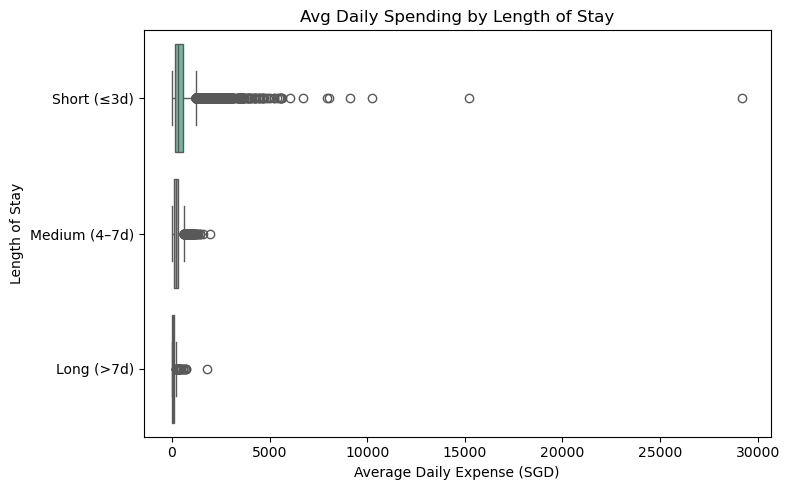

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom order
stay_order = ['Short (≤3d)', 'Medium (4–7d)', 'Long (>7d)']

# Map Stay_Length_Code to ordered label
stay_labels = {0: 'Short (≤3d)', 1: 'Medium (4–7d)', 2: 'Long (>7d)'}
df_cleaned['Stay_Label'] = df_cleaned['Stay_Length_Code'].map(stay_labels)

# --------------------
# Horizontal Boxplot
# --------------------
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, y='Stay_Label', x='avg_daily_expense',
            order=stay_order, palette='Set2')
plt.title('Avg Daily Spending by Length of Stay')
plt.xlabel('Average Daily Expense (SGD)')
plt.ylabel('Length of Stay')
plt.tight_layout()
plt.show()

#can consider histo

C:\Users\alvin\AppData\Local\Temp\ipykernel_12212\1038298961.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Stay_Label', y='avg_daily_expense',


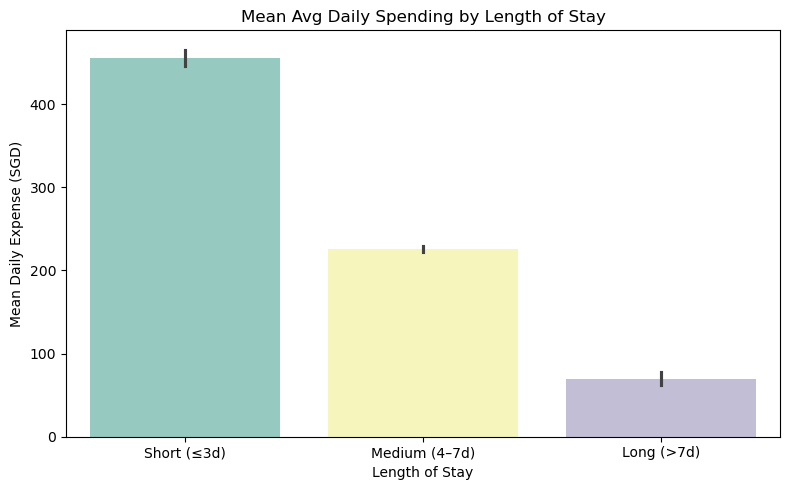

In [58]:

# --------------------
# Bar Plot (Mean)
# --------------------
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cleaned, x='Stay_Label', y='avg_daily_expense',
            order=stay_order, estimator='mean', palette='Set3')
plt.title('Mean Avg Daily Spending by Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Mean Daily Expense (SGD)')
plt.tight_layout()
plt.show()


C:\Users\alvin\AppData\Local\Temp\ipykernel_12212\2248851148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Main_Transport_Mode', y='avg_daily_expense', estimator='mean', palette='Set3')


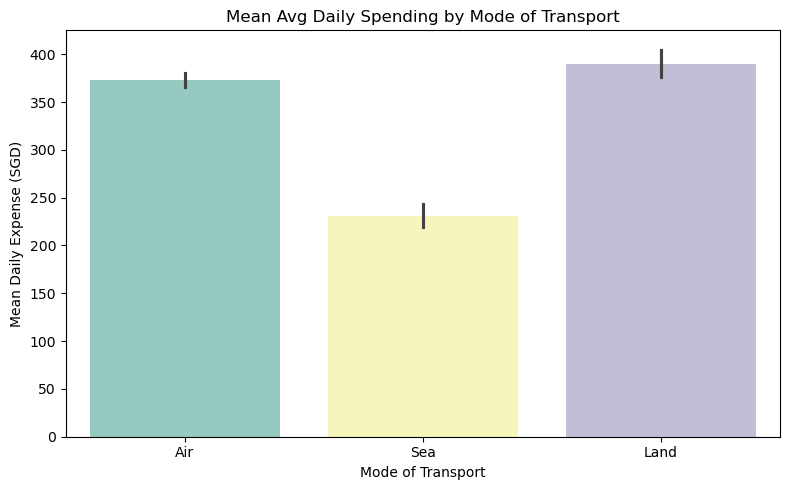

In [59]:

# --------------------
# Bar Plot (Mean)
# --------------------
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cleaned, x='Main_Transport_Mode', y='avg_daily_expense', estimator='mean', palette='Set3')
plt.title('Mean Avg Daily Spending by Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Mean Daily Expense (SGD)')
plt.tight_layout()
plt.show()


## Hotel types

In [100]:
df_cleaned['MainHotel'].isnull().sum()

6688

In [61]:
 top_20_values = df_cleaned['MainHotel'].value_counts().head(20)
print(top_20_values)

# Marina Bay sands 705
# Ibis Singapore on Bencoolen 770
# V Hotel Lavender 721
# Carlton Hotel 9
# Marina Mandarin 49
# Parkroyal on Kitchener Road 63
# Concorde Hotel Singapore 46
# Village Hotel Bugis 23
# Bayview Hotel Singapore 6
# Village Hotel Albert Court 1
# Amara Singapore 4
# Grand Hyatt Singapore 26
# Orchard Hotel Singapore 56
# Holiday Inn Singapore Orchard City Centre 32
# Parkroyal on Beach Road, Singapore 61
# Big Hotel 837
# Swissotel The Stamford, Singapore 81
# Mandarin Orchard Singapore 51
# The Pan Pacific Hotel Singapore 87
# Peninsula.Excelsior Hotel 64

MainHotel
705.0    701
770.0    449
721.0    432
9.0      407
49.0     294
63.0     289
46.0     261
23.0     257
6.0      247
1.0      245
4.0      245
26.0     242
56.0     237
32.0     237
61.0     234
837.0    227
81.0     217
51.0     216
87.0     214
64.0     212
Name: count, dtype: int64


C:\Users\alvin\AppData\Local\Temp\ipykernel_12212\3881101903.py:54: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1600x800 with 0 Axes>

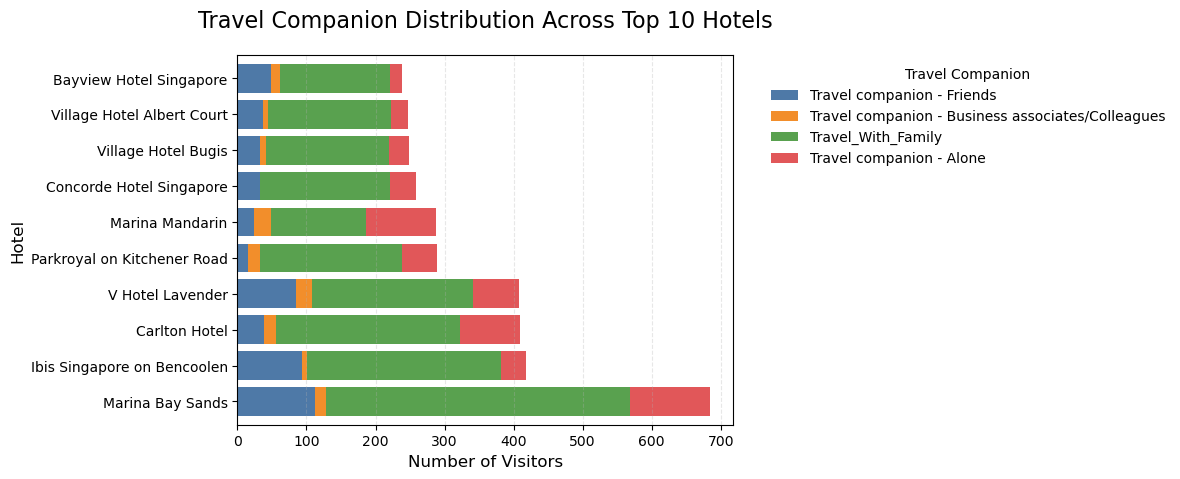

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Hotel ID to name mapping
hotel_mapping = {
    705: "Marina Bay Sands",
    770: "Ibis Singapore on Bencoolen",
    721: "V Hotel Lavender",
    9: "Carlton Hotel",
    49: "Marina Mandarin",
    63: "Parkroyal on Kitchener Road",
    46: "Concorde Hotel Singapore",
    23: "Village Hotel Bugis",
    6: "Bayview Hotel Singapore",
    1: "Village Hotel Albert Court"
}

# 1. Filter for top 10 hotels and map IDs to names
df_top = df_cleaned[df_cleaned['MainHotel'].isin(hotel_mapping.keys())].copy()
df_top['Hotel_Name'] = df_top['MainHotel'].map(hotel_mapping)

# 2. Group by hotel name and sum companion types
companion_counts = df_top.groupby('Hotel_Name')[
    ['Travel companion - Friends',
     'Travel companion - Business associates/Colleagues',
     'Travel_With_Family',
     'Travel companion - Alone']
].sum()

# 3. Sort by total visitors (descending)
companion_counts = companion_counts.loc[sorted(hotel_mapping.values(), 
                                         key=lambda x: -companion_counts.loc[x].sum())]

# 4. Create horizontal stacked bar chart
plt.figure(figsize=(16, 8))
ax = companion_counts.plot(kind='barh', 
                         stacked=True, 
                         color=['#4e79a7', '#f28e2b', '#59a14f', '#e15759'],
                         width=0.8)

# Customize the plot
plt.title('Travel Companion Distribution Across Top 10 Hotels', fontsize=16, pad=20)
plt.xlabel('Number of Visitors', fontsize=12)
plt.ylabel('Hotel', fontsize=12)
plt.legend(title='Travel Companion', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           frameon=False)

# Add grid lines
ax.xaxis.grid(True, linestyle='--', alpha=0.3)

# Improve readability
plt.tight_layout()
plt.show()

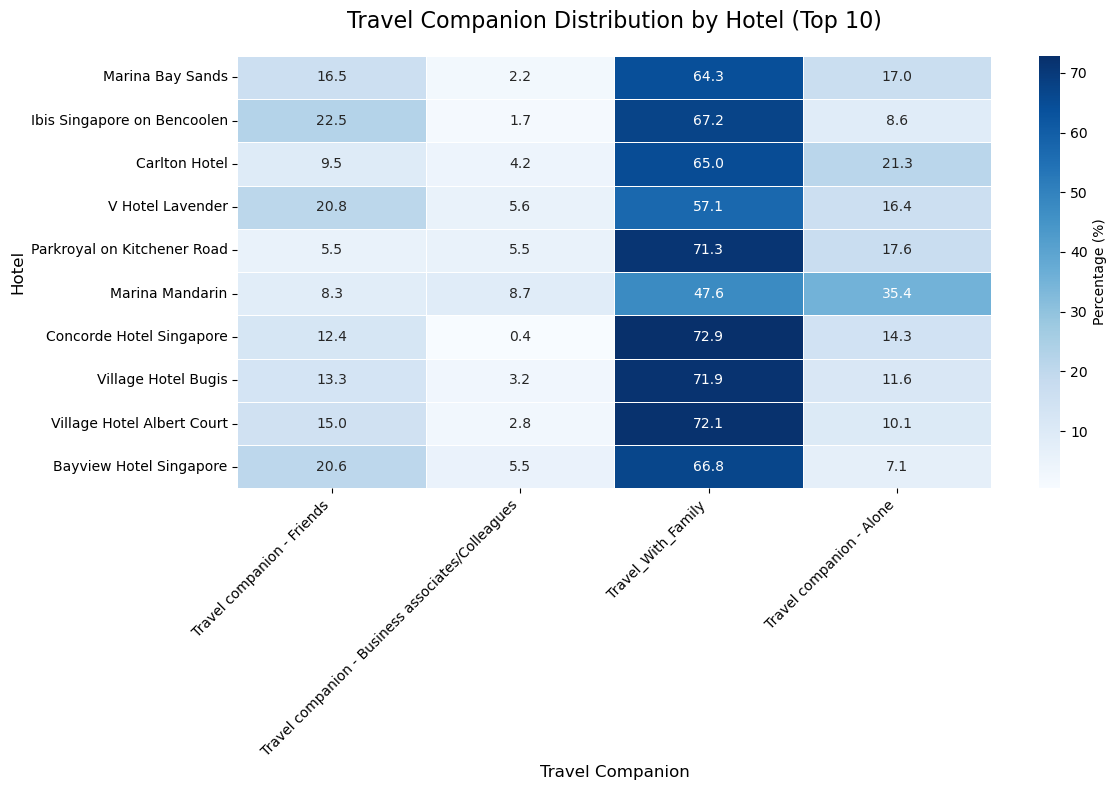

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hotel ID to name mapping
hotel_mapping = {
    705: "Marina Bay Sands",
    770: "Ibis Singapore on Bencoolen",
    721: "V Hotel Lavender",
    9: "Carlton Hotel",
    49: "Marina Mandarin",
    63: "Parkroyal on Kitchener Road",
    46: "Concorde Hotel Singapore",
    23: "Village Hotel Bugis",
    6: "Bayview Hotel Singapore",
    1: "Village Hotel Albert Court"
}

# 1. Filter for top hotels and map IDs to names
df_top = df_cleaned[df_cleaned['MainHotel'].isin(hotel_mapping.keys())].copy()
df_top['Hotel_Name'] = df_top['MainHotel'].map(hotel_mapping)

# 2. Group by hotel name and sum companion types
companion_counts = df_top.groupby('Hotel_Name')[
    ['Travel companion - Friends',
     'Travel companion - Business associates/Colleagues',
     'Travel_With_Family',
     'Travel companion - Alone']
].sum()

# 3. Convert to percentages
companion_percent = companion_counts.div(companion_counts.sum(axis=1), axis=0) * 100

# 4. Sort by total visitors (optional)
companion_percent = companion_percent.loc[sorted(hotel_mapping.values(),
                                             key=lambda x: -companion_counts.loc[x].sum())]

# 5. Create heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(companion_percent, 
                annot=True, 
                fmt='.1f', 
                cmap='Blues', 
                linewidths=0.5,
                cbar_kws={'label': 'Percentage (%)'})

# Customize plot
plt.title('Travel Companion Distribution by Hotel (Top 10)', fontsize=16, pad=20)
plt.xlabel('Travel Companion', fontsize=12)
plt.ylabel('Hotel', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Improve layout
plt.tight_layout()
plt.show()

In [64]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 1. First ensure you have the hotel mapping and filtered data
hotel_mapping = {
    705: "Marina Bay Sands",
    770: "Ibis Singapore on Bencoolen",
    721: "V Hotel Lavender",
    9: "Carlton Hotel",
    49: "Marina Mandarin",
    63: "Parkroyal on Kitchener Road",
    46: "Concorde Hotel Singapore",
    23: "Village Hotel Bugis",
    6: "Bayview Hotel Singapore",
    1: "Village Hotel Albert Court"
}

# 2. Filter your dataframe for top hotels and map IDs to names
df_top = df_cleaned[df_cleaned['MainHotel'].isin(hotel_mapping.keys())].copy()
df_top['Hotel_Name'] = df_top['MainHotel'].map(hotel_mapping)

# 3. Create companion_dist 
companion_dist = df_top.groupby('Hotel_Name')[
    ['Travel companion - Friends',
     'Travel companion - Business associates/Colleagues',
     'Travel_With_Family',
     'Travel companion - Alone']
].sum()

# Now the statistical test will work:
chi2, p, dof, expected = chi2_contingency(companion_dist)
n = companion_dist.sum().sum()
cramers_v = np.sqrt(chi2/(n * min(companion_dist.shape[0]-1, companion_dist.shape[1]-1)))

print("=== Results ===")
print(f"Chi-square: {chi2:.1f}", f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Cramer's V: {cramers_v:.3f}")

=== Results ===
Chi-square: 245.5 p-value: 0.0000
Degrees of freedom: 27
Cramer's V: 0.153


In [65]:
# K Means
# How many different segment of visitors can be identified from the survey data

In [66]:
df_cleaned2 = df_cleaned.copy()

In [67]:
df_cleaned.columns

Index(['case', 'year', 'month', 'Country of Residence', 'City of Residence',
       'Purpose of Visit', 'Main Purpose of Visit', 'Weights_QTR',
       'Air_Terminal', 'Sea_Terminal', 'Land_Terminal',
       'First Visit To Singapore', 'Length of Stay', 'Travel Type', 'Gender',
       'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation',
       'Designation (free text)', 'shopping_fash', 'shopping_jewllery',
       'shopping_watches', 'shopping_wellness', 'shopping_food',
       'shopping_gifts', 'shopping_consumertech', 'shopping_antiques',
       'shopping_others', 'shopping_any', 'totacc', 'totfnb', 'tottran',
       'totbiz', 'totedu', 'totmedi', 'tototh', 'totshopping_rep', 'tot.exp',
       'c4a_1', 'MainHotel', 'Travel companion - Alone',
       'Travel companion - Spouse', 'Travel companion - Your Child/Children',
       'Travel companion - Parents/Parents-in-law',
       'Travel companion - Grandparents/Grandparents-in-law',
       'Travel companion - Siblings', 

In [68]:
pd.set_option('display.max_rows', None)
print(df_cleaned.isnull().sum())

case                                                       2
year                                                       0
month                                                      0
Country of Residence                                       0
City of Residence                                          0
Purpose of Visit                                        2333
Main Purpose of Visit                                      0
Weights_QTR                                                0
Air_Terminal                                            4993
Sea_Terminal                                           20578
Land_Terminal                                          20345
First Visit To Singapore                                   0
Length of Stay                                             0
Travel Type                                                0
Gender                                                     0
Marital Status                                             0
Occupation              

In [69]:
# Access feature names - removed categorical variable 'alpha' given that PCA cannot handle categorical variables
dataset_features = df_cleaned.drop(['case', 'year', 'month', 'Country of Residence', 'City of Residence', 'Purpose of Visit',
                                'Main Purpose of Visit', 'Air_Terminal', 'Sea_Terminal', 'Land_Terminal',
                                'First Visit To Singapore', 'Length of Stay', 'Travel Type', 'Gender',
                                 'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation',
                                'Designation (free text)', 'Travel companion - Spouse', 'Travel companion - Your Child/Children',
                                 'Travel companion - Parents/Parents-in-law', 'Travel companion - Grandparents/Grandparents-in-law',
                                 'Travel companion - Siblings', 'Travel companion - Other relatives', 'c4a_1', 'MainHotel', 'date',
                                   'Main_Transport_Mode', 'Length of Stay_fixed', 'Travel_Type_Code', 'Stay_Label', 'Weights_QTR',
                                    'Travel companion - Alone', 'Travel companion - Friends', 'Travel companion - Business associates/Colleagues',
                                       'Travel companion - Others', 'Travel_With_Family', 'Stay_Length_Code','Gender_Code',
                                    'Marital_Status_Code', 'occupation_coded'], axis=1)

print("Feature names:", dataset_features.columns)

Feature names: Index(['shopping_fash', 'shopping_jewllery', 'shopping_watches',
       'shopping_wellness', 'shopping_food', 'shopping_gifts',
       'shopping_consumertech', 'shopping_antiques', 'shopping_others',
       'shopping_any', 'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu',
       'totmedi', 'tototh', 'totshopping_rep', 'tot.exp', 'avg_daily_expense'],
      dtype='object')


In [70]:
X = dataset_features

In [71]:
# numeric col checker
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print(non_numeric_cols)
X[non_numeric_cols].head()

Index([], dtype='object')


""
0
1
2
3
4


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


K=2 → Silhouette Score = 0.4802
K=3 → Silhouette Score = 0.3228
K=4 → Silhouette Score = 0.3205
K=5 → Silhouette Score = 0.2894
K=6 → Silhouette Score = 0.2933
K=7 → Silhouette Score = 0.2878
K=8 → Silhouette Score = 0.2882
K=9 → Silhouette Score = 0.2371
K=10 → Silhouette Score = 0.2250

 Best K = 2 with Silhouette Score = 0.4802


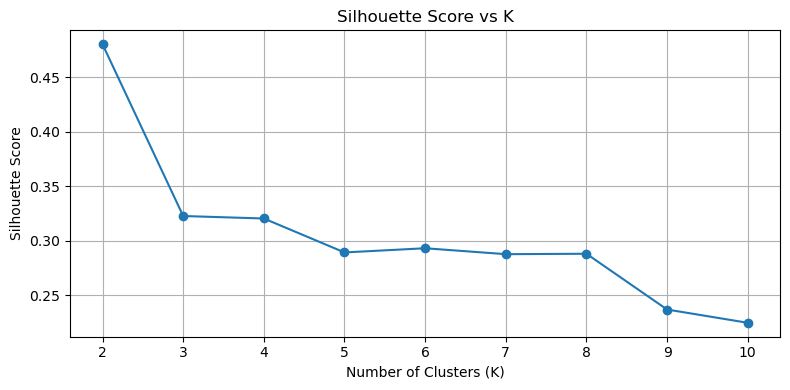

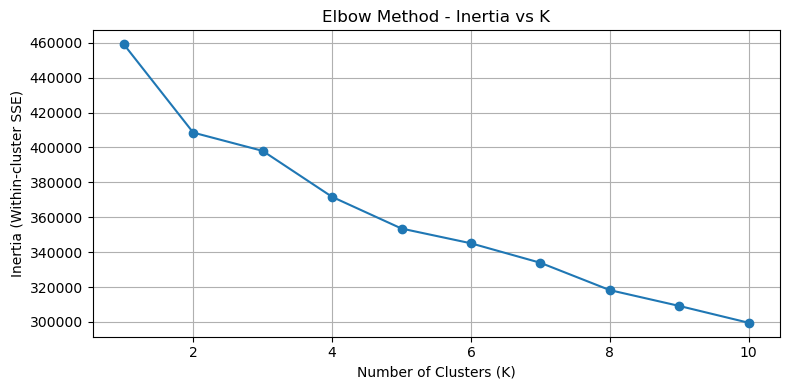

In [73]:


# STEP 2: Find optimal K using Silhouette Score
silhouette_scores = []
best_k = None
best_score = -1

K_range = range(2, 11)  # Try K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

    print(f"K={k} → Silhouette Score = {score:.4f}")
    if score > best_score:
        best_k = k
        best_score = score

print(f"\n Best K = {best_k} with Silhouette Score = {best_score:.4f}")

# STEP 3: Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 4: Elbow Method - Plot Inertia
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method - Inertia vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
# Run KMeans again with the best K
final_kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_scaled)

# Add the cluster labels to your original (non-scaled) DataFrame
df_cleaned['cluster'] = cluster_labels


In [75]:
df_cleaned.groupby('cluster')[['shopping_fash', 'shopping_jewllery', 'shopping_watches', 'shopping_wellness',
                               'shopping_food', 'shopping_gifts', 'shopping_consumertech', 'shopping_antiques', 'shopping_others',
                               'shopping_any', 'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu', 'totmedi', 'tototh', 
                               'totshopping_rep', 'tot.exp', 'avg_daily_expense']].mean()

,shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others,shopping_any,totacc,totfnb,tottran,totbiz,totedu,totmedi,tototh,totshopping_rep,tot.exp,avg_daily_expense
cluster,,,,,,,,,,,,,,,,,,,,
0,59.383901,3.911076,4.001581,26.744765,18.622610,23.897316,5.269684,2.348481,11.188556,155.941779,280.707371,125.085784,50.408361,3.279891,0.379798,1.553662,10.963957,230.788572,695.167575,269.541616
1,349.100300,59.482076,40.187909,137.704235,42.863623,54.102144,56.791310,7.168697,38.740877,786.141171,740.899069,312.238105,121.956990,16.944119,3.893028,7.703566,38.704143,848.295415,2087.907225,824.063849


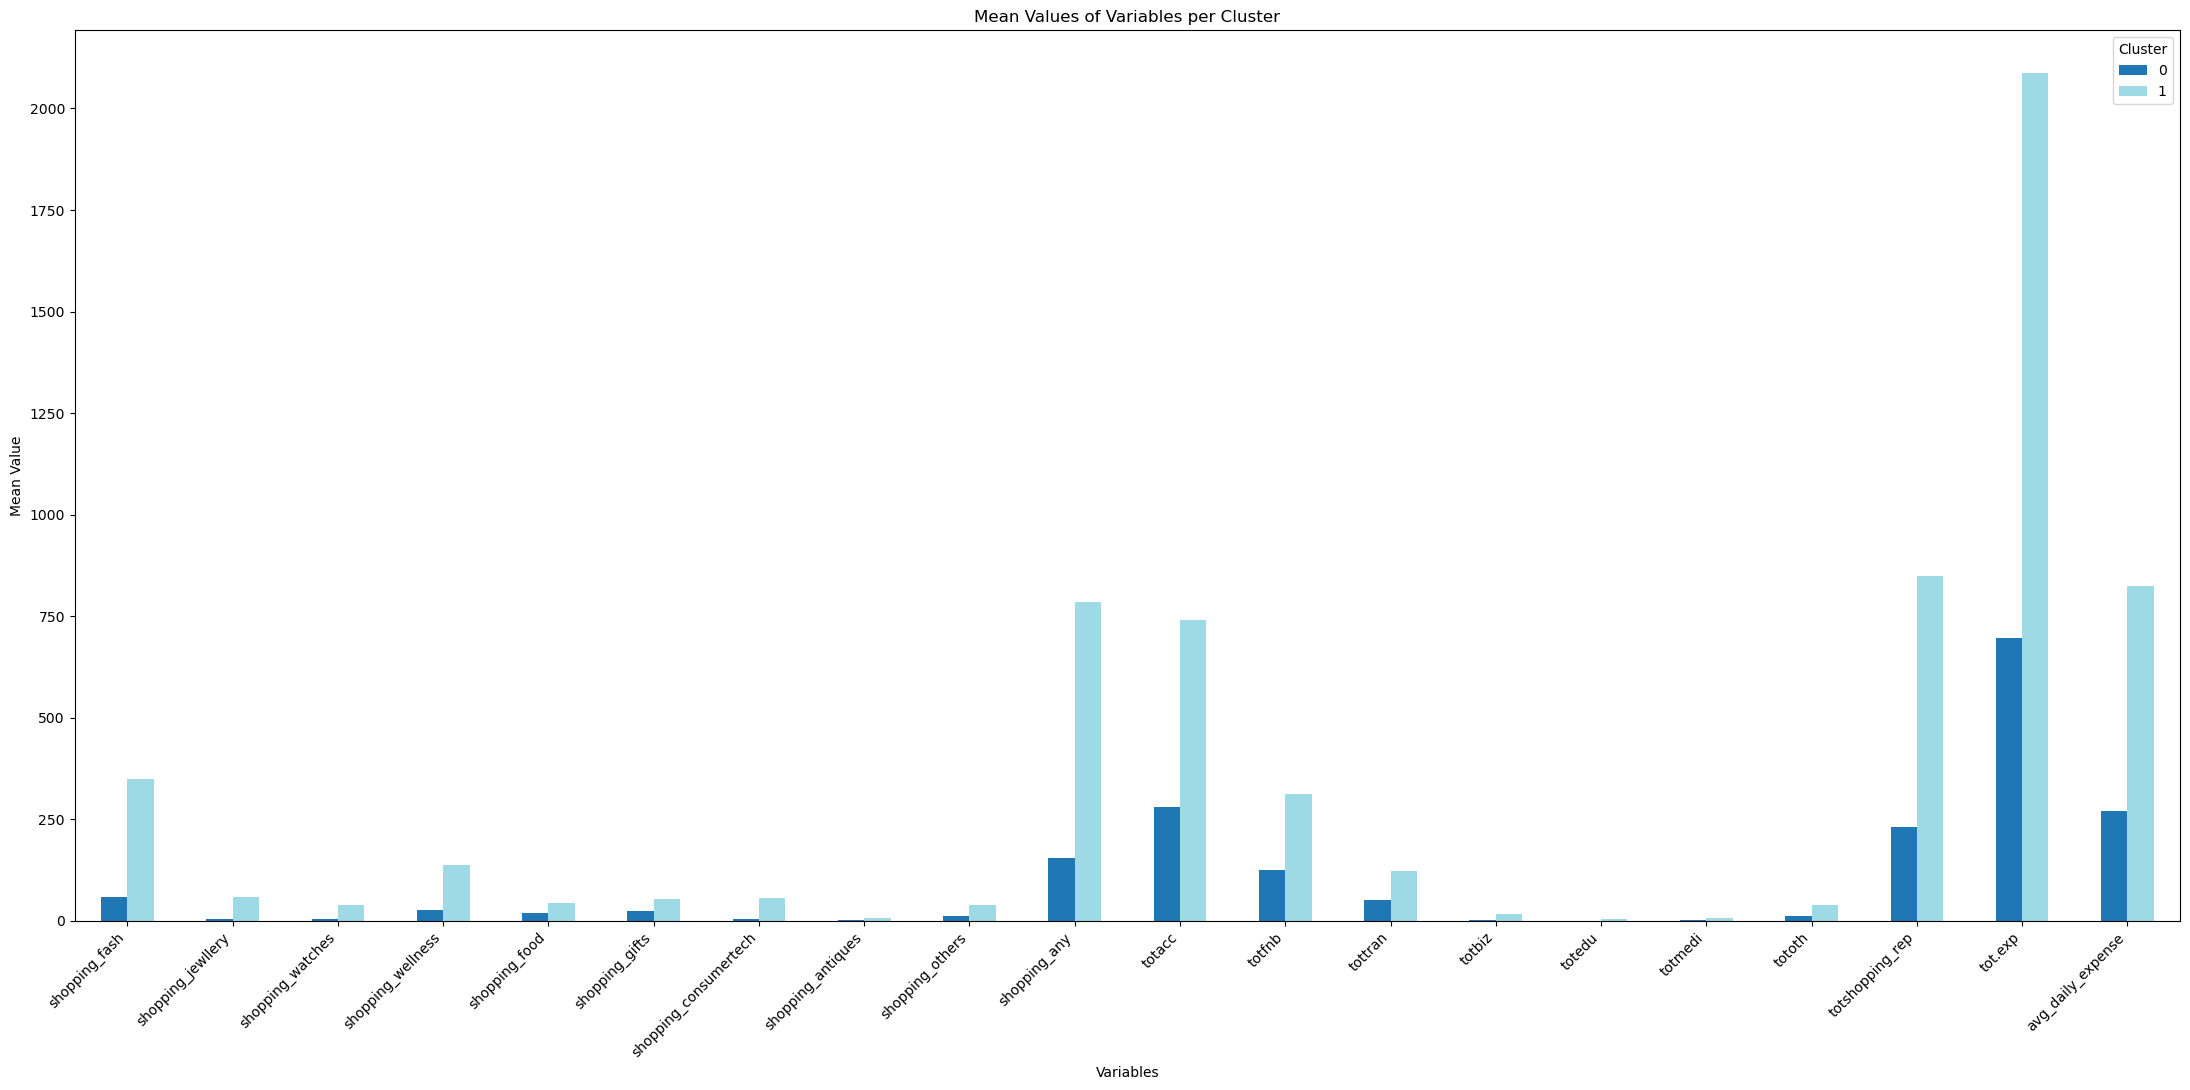

In [76]:
cluster_means = df_cleaned.groupby('cluster')[[
    'shopping_fash', 'shopping_jewllery', 'shopping_watches', 'shopping_wellness',
    'shopping_food', 'shopping_gifts', 'shopping_consumertech', 'shopping_antiques', 'shopping_others',
    'shopping_any', 'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu', 'totmedi', 'tototh', 
    'totshopping_rep', 'tot.exp', 'avg_daily_expense'
]].mean()

cluster_means.T.plot(kind='bar', figsize=(22, 11), colormap='tab20')
plt.title('Mean Values of Variables per Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


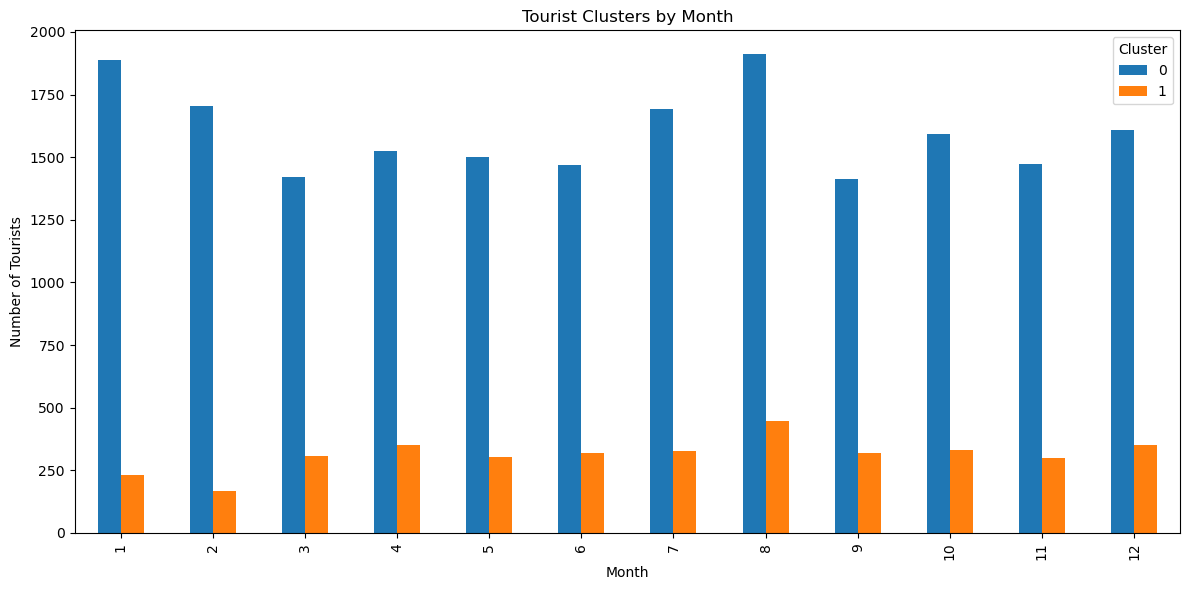

In [77]:
# Count of tourists by cluster and month
df_cleaned.groupby(['cluster', 'month']).size().unstack().T.plot(kind='bar', figsize=(12, 6))

plt.title('Tourist Clusters by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tourists')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [78]:
shopping_cols = [
    'shopping_fash', 'shopping_jewllery', 'shopping_watches',
    'shopping_wellness', 'shopping_food', 'shopping_gifts',
    'shopping_consumertech', 'shopping_antiques', 'shopping_others'
]

for col in shopping_cols:
    print(f"== {col} ==")
    print(df_cleaned[col].apply(lambda x: 'Spent' if x > 0 else 'Not Spent').value_counts())
    print()


== shopping_fash ==
shopping_fash
Spent        11559
Not Spent    11400
Name: count, dtype: int64

== shopping_jewllery ==
shopping_jewllery
Not Spent    22031
Spent          928
Name: count, dtype: int64

== shopping_watches ==
shopping_watches
Not Spent    21595
Spent         1364
Name: count, dtype: int64

== shopping_wellness ==
shopping_wellness
Not Spent    15484
Spent         7475
Name: count, dtype: int64

== shopping_food ==
shopping_food
Not Spent    14589
Spent         8370
Name: count, dtype: int64

== shopping_gifts ==
shopping_gifts
Not Spent    13701
Spent         9258
Name: count, dtype: int64

== shopping_consumertech ==
shopping_consumertech
Not Spent    21611
Spent         1348
Name: count, dtype: int64

== shopping_antiques ==
shopping_antiques
Not Spent    22298
Spent          661
Name: count, dtype: int64

== shopping_others ==
shopping_others
Not Spent    19456
Spent         3503
Name: count, dtype: int64



In [79]:
shopping_cols = [
'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu', 'totmedi', 'tototh'
]

for col in shopping_cols:
    print(f"== {col} ==")
    print(df_cleaned[col].apply(lambda x: 'Spent' if x > 0 else 'Not Spent').value_counts())
    print()


== totacc ==
totacc
Spent        16847
Not Spent     6112
Name: count, dtype: int64

== totfnb ==
totfnb
Spent        19806
Not Spent     3153
Name: count, dtype: int64

== tottran ==
tottran
Spent        21100
Not Spent     1859
Name: count, dtype: int64

== totbiz ==
totbiz
Not Spent    22193
Spent          766
Name: count, dtype: int64

== totedu ==
totedu
Not Spent    22936
Spent           23
Name: count, dtype: int64

== totmedi ==
totmedi
Not Spent    22828
Spent          131
Name: count, dtype: int64

== tototh ==
tototh
Spent        13696
Not Spent     9263
Name: count, dtype: int64



In [80]:
# K modes

# Length of Stay String
def encode_stay(length):
    if pd.isnull(length):
        return None
    elif length <= 3:
        return "Short Stay"
    elif 4 <= length <= 7:
        return "Medium Stay"
    else:
        return "Long Stay"

df_cleaned2['Stay_Length_string'] = df_cleaned['Length of Stay'].apply(encode_stay)
# ----------------------------------------------------------------------------------
# Create a new column 'Travel_With_Family_string' with "Yes" or "No"
df_cleaned2['Travel_With_Family_string'] = (
    (df_cleaned['Travel companion - Spouse'] == 1) |
    (df_cleaned['Travel companion - Parents/Parents-in-law'] == 1) |
    (df_cleaned['Travel companion - Grandparents/Grandparents-in-law'] == 1) |
    (df_cleaned['Travel companion - Siblings'] == 1) |
    (df_cleaned['Travel companion - Other relatives'] == 1)
).apply(lambda x: "Yes" if x else "No")
# ----------------------------------------------------------------------------------
# 'Travel companion - Alone_String'
df_cleaned2['Travel_Alone_string'] = df_cleaned['Travel companion - Alone'].map({1: 'Yes', 0: 'No'})

# ----------------------------------------------------------------------------------
# Create a new column 'occupation_coded_string' with descriptive group labels
df_cleaned2['occupation_coded_string'] = None

# Group 1 → "Non-working"
df_cleaned2.loc[
    df_cleaned['Occupation'].isin([
        'Retired',
        'Student',
        'Homemaker (full time)',
        'Unemployed',
        'Others (specify)'
    ]),
    'occupation_coded_string'
] = 'Non-working'

# Group 2 → "Working professional"
df_cleaned2.loc[
    df_cleaned['Occupation'].isin([
        'Other White collar (teacher, nurse, secretary,',
        'Executive (sales, administration)',
        'Manager (CEO, company director, senior manager)',
        'Professionals (doctor, lawyer, lecturer, etc)',
        'Blue collar (technician, hairdresser, hawker, taxi drivers'
    ]),
    'occupation_coded_string'
] = 'Working professional'

# Group 3 → "Business owner"
df_cleaned2.loc[
    df_cleaned['Occupation'].isin([
        'Businessman (small company, <50 people)',
        'Businessman (medium size company, 50 -250 people)',
        'Businessman (large company, > 250 people)'
    ]),
    'occupation_coded_string'
] = 'Business owner'


In [81]:
df_cleaned2['Travel_With_Family_string'].value_counts()

Travel_With_Family_string
Yes    11779
No     11180
Name: count, dtype: int64

In [82]:
df_cleaned2['Travel_Alone_string'].value_counts()


Travel_Alone_string
No     17256
Yes     5703
Name: count, dtype: int64

In [83]:
df_cleaned2['Stay_Length_string'].value_counts()

Stay_Length_string
Short Stay     13988
Medium Stay     8173
Long Stay        798
Name: count, dtype: int64

In [84]:
# Optional: Check result
df_cleaned2['occupation_coded_string'].value_counts()

occupation_coded_string
Working professional    14536
Non-working              5735
Business owner           2688
Name: count, dtype: int64

In [ ]:
# Access feature names - removed categorical variable 'alpha' given that PCA cannot handle categorical variables
dataset_features2 = df_cleaned2.drop(['case', 'year', 'month', 'City of Residence', 'Purpose of Visit',
                                'Main Purpose of Visit', 'Air_Terminal', 'Sea_Terminal', 'Land_Terminal',
                                'First Visit To Singapore', 'Length of Stay', 'Travel Type', 'Gender',
                                  'Occupation', 'Occupation.1', 'Other Designation',
                                'Designation (free text)', 'Travel companion - Spouse', 'Travel companion - Your Child/Children',
                                 'Travel companion - Parents/Parents-in-law', 'Travel companion - Grandparents/Grandparents-in-law',
                                 'Travel companion - Siblings', 'Travel companion - Other relatives', 'c4a_1', 'MainHotel', 'date',
                                   'Main_Transport_Mode', 'Length of Stay_fixed', 'Travel_Type_Code', 'Stay_Label', 'Weights_QTR',
                                    'Travel companion - Alone', 'Travel companion - Friends', 'Travel companion - Business associates/Colleagues',
                                       'Travel companion - Others', 'Travel_With_Family', 'Stay_Length_Code','Gender_Code',
                                    'Marital_Status_Code', 'occupation_coded', 'Country of Residence', 'Marital Status'], axis=1)

print("Feature names:", dataset_features2.columns)

In [86]:
dataset_features2.isnull().sum()

shopping_fash                0
shopping_jewllery            0
shopping_watches             0
shopping_wellness            0
shopping_food                0
shopping_gifts               0
shopping_consumertech        0
shopping_antiques            0
shopping_others              0
shopping_any                 0
totacc                       0
totfnb                       0
tottran                      0
totbiz                       0
totedu                       0
totmedi                      0
tototh                       0
totshopping_rep              0
tot.exp                      0
avg_daily_expense            0
Stay_Length_string           0
Travel_With_Family_string    0
Travel_Alone_string          0
occupation_coded_string      0
dtype: int64

In [87]:
# Strings included in the Kmodes model - 'Stay_Length_string', 'Travel_With_Family_string', 'Travel_Alone_string', 'occupation_coded_string'

In [88]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define columns
categorical_columns = ['Stay_Length_string', 'Travel_With_Family_string', 'Travel_Alone_string', 'occupation_coded_string']
numerical_columns = ['shopping_fash', 'shopping_jewllery', 'shopping_watches',
       'shopping_wellness', 'shopping_food', 'shopping_gifts',
       'shopping_consumertech', 'shopping_antiques', 'shopping_others',
       'shopping_any', 'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu',
       'totmedi', 'tototh', 'totshopping_rep', 'tot.exp', 'avg_daily_expense']

# Step 1: Scale numeric columns
scaler = StandardScaler()
df_scaled_num = scaler.fit_transform(df_cleaned2[numerical_columns])

# Step 2: Reset index to ensure alignment
scaled_df = pd.DataFrame(df_scaled_num, columns=numerical_columns).reset_index(drop=True)
cat_df = df_cleaned2[categorical_columns].astype(str).reset_index(drop=True)

# Step 3: Combine scaled numeric and categorical data
df_scaled = pd.concat([scaled_df, cat_df], axis=1)


In [89]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22959 entries, 0 to 22958
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   shopping_fash              22959 non-null  float64
 1   shopping_jewllery          22959 non-null  float64
 2   shopping_watches           22959 non-null  float64
 3   shopping_wellness          22959 non-null  float64
 4   shopping_food              22959 non-null  float64
 5   shopping_gifts             22959 non-null  float64
 6   shopping_consumertech      22959 non-null  float64
 7   shopping_antiques          22959 non-null  float64
 8   shopping_others            22959 non-null  float64
 9   shopping_any               22959 non-null  float64
 10  totacc                     22959 non-null  float64
 11  totfnb                     22959 non-null  float64
 12  tottran                    22959 non-null  float64
 13  totbiz                     22959 non-null  flo

In [90]:
categorical_idx = [20, 21, 22, 23]

In [91]:
df_scaled.head()

,shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others,shopping_any,...,totedu,totmedi,tototh,totshopping_rep,tot.exp,avg_daily_expense,Stay_Length_string,Travel_With_Family_string,Travel_Alone_string,occupation_coded_string
0,-0.431151,-0.103678,-0.108962,-0.427844,-0.488787,0.824720,-0.139293,-0.09104,-0.237413,-0.478358,...,-0.013333,-0.053156,0.464578,-0.620344,0.663978,-0.234354,Medium Stay,Yes,No,Working professional
1,-0.431151,-0.103678,-0.108962,-0.427844,-0.488787,-0.515310,-0.139293,-0.09104,-0.237413,-0.673241,...,-0.013333,-0.053156,0.051993,-0.822486,-0.980954,-0.739929,Long Stay,No,Yes,Non-working
2,15.715980,-0.103678,-0.108962,-0.427844,-0.488787,-0.515310,-0.139293,-0.09104,-0.237413,9.720496,...,-0.013333,-0.053156,-0.032909,10.087928,5.193991,1.075304,Medium Stay,No,Yes,Working professional
3,-0.128392,-0.103678,0.302747,0.048523,0.593057,0.154705,-0.139293,-0.09104,-0.237413,-0.023632,...,-0.013333,-0.053156,0.277495,-0.148680,-0.295982,-0.545048,Medium Stay,Yes,No,Working professional
4,7.642415,-0.103678,-0.108962,-0.427844,-0.488787,-0.515310,-0.139293,-0.09104,-0.237413,4.523628,...,-0.013333,-0.053156,-0.032909,4.686693,3.880094,3.574384,Short Stay,No,Yes,Working professional


In [92]:
df_scaled.isnull().sum()

shopping_fash                0
shopping_jewllery            0
shopping_watches             0
shopping_wellness            0
shopping_food                0
shopping_gifts               0
shopping_consumertech        0
shopping_antiques            0
shopping_others              0
shopping_any                 0
totacc                       0
totfnb                       0
tottran                      0
totbiz                       0
totedu                       0
totmedi                      0
tototh                       0
totshopping_rep              0
tot.exp                      0
avg_daily_expense            0
Stay_Length_string           0
Travel_With_Family_string    0
Travel_Alone_string          0
occupation_coded_string      0
dtype: int64

In [93]:
from kmodes.kprototypes import KPrototypes

In [96]:
# Step 1: Convert df to NumPy matrix (required for K-Prototypes)
matrix = df_scaled.to_numpy()

# Step 3: Define K range and number of runs
K_range = range(2, 11)
n_runs = 5

# Step 4: Initialize tracking variables
best_overall_cost = float('inf')
best_overall_kproto = None
best_overall_clusters = None
best_k = None
costs = []  # Store best cost for each K


In [98]:
for k in K_range:
    best_cost_for_k = float('inf')
    best_kproto_for_k = None
    best_clusters_for_k = None

    for i in range(n_runs):
        kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=i)
        clusters = kproto.fit_predict(matrix, categorical=categorical_idx)

        if kproto.cost_ < best_cost_for_k:
            best_cost_for_k = kproto.cost_
            best_kproto_for_k = kproto
            best_clusters_for_k = clusters

    costs.append(best_cost_for_k)

    if best_cost_for_k < best_overall_cost:
        best_overall_cost = best_cost_for_k
        best_overall_kproto = best_kproto_for_k
        best_overall_clusters = best_clusters_for_k
        best_k = k


KeyboardInterrupt: 

In [94]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt


# Step 5: Loop through K values
for k in K_range:
    best_cost_for_k = float('inf')
    best_kproto_for_k = None
    best_clusters_for_k = None

    for i in range(n_runs):
        kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=i)
        clusters = kproto.fit_predict(matrix, categorical=categorical_idx)

        if kproto.cost_ < best_cost_for_k:
            best_cost_for_k = kproto.cost_
            best_kproto_for_k = kproto
            best_clusters_for_k = clusters

    # Store best result for this K
    costs.append(best_cost_for_k)

    if best_cost_for_k < best_overall_cost:
        best_overall_cost = best_cost_for_k
        best_overall_kproto = best_kproto_for_k
        best_overall_clusters = best_clusters_for_k
        best_k = k

# Step 6: Assign best clustering to dataframe
df_scaled['cluster'] = best_overall_clusters

# Step 7: Plot elbow chart
plt.figure(figsize=(8, 4))
plt.plot(K_range, costs, marker='o')
plt.title('Elbow Method using K-Prototypes (5 runs per K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Lowest Cost from 5 Runs')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Optional printout
print(f"Best number of clusters (K): {best_k} with cost: {best_overall_cost}")


KeyboardInterrupt: 

In [ ]:


# STEP 2: Find optimal K using Silhouette Score
silhouette_scores = []
best_k = None
best_score = -1

K_range = range(2, 11)  # Try K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

    print(f"K={k} → Silhouette Score = {score:.4f}")
    if score > best_score:
        best_k = k
        best_score = score

print(f"\n Best K = {best_k} with Silhouette Score = {best_score:.4f}")

# STEP 3: Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 4: Elbow Method - Plot Inertia
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method - Inertia vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Run KMeans again with the best K
final_kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_scaled)

# Add the cluster labels to your original (non-scaled) DataFrame
df_cleaned2['cluster'] = cluster_labels


In [ ]:
df_cleaned2.groupby('cluster')[['shopping_fash', 'shopping_jewllery', 'shopping_watches',
       'shopping_wellness', 'shopping_food', 'shopping_gifts',
       'shopping_consumertech', 'shopping_antiques', 'shopping_others',
       'totshopping_rep', 'tot.exp', 'Travel companion - Alone',
       'Travel_With_Family', 'Stay_Length_Code', 'Gender_Code',
       'Marital_Status_Code', 'occupation_coded', 'avg_daily_expense',]].mean()

In [ ]:
# Count of tourists by cluster and month
df_cleaned.groupby(['cluster', 'month']).size().unstack().T.plot(kind='bar', figsize=(12, 6))

plt.title('Tourist Clusters by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tourists')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [104]:
df_cleaned['c4a_1'].value_counts()


c4a_1
1    15931
0     7028
Name: count, dtype: int64

In [108]:
df_cleaned['MainHotel'].isnull().sum()

6688

In [110]:
df_cleaned['avg_daily_expense'].min()


0.0

In [112]:
df_cleaned['avg_daily_expense'].max()

29206.42

In [118]:
df_cleaned['avg_daily_expense'].describe()

count    22959.000000
mean       360.307527
std        484.280639
min          0.000000
25%        123.361667
50%        258.182500
75%        444.670000
max      29206.420000
Name: avg_daily_expense, dtype: float64